In [1]:
""" sheet1_implementation.py

PUT YOUR NAME HERE:
Boris Bubla
Leonard Paeleke


Write the functions
- pca
- gammaidx
- lle
Write your implementations in the given functions stubs!


(c) Daniel Bartz, TU Berlin, 2013
"""


' sheet1_implementation.py\n\nPUT YOUR NAME HERE:\nBoris Bubla\nLeonard Paeleke\n\n\nWrite the functions\n- pca\n- gammaidx\n- lle\nWrite your implementations in the given functions stubs!\n\n\n(c) Daniel Bartz, TU Berlin, 2013\n'

In [31]:
import numpy as np
import scipy.linalg as la
import scipy.spatial as sp
import matplotlib.pyplot as plt
from scipy.linalg import expm

In [3]:
X = np.array([[ -2.133268233289599,   0.903819474847349,   2.217823388231679, -0.444779660856219,
                -0.661480010318842,  -0.163814281248453,  -0.608167714051449,  0.949391996219125],
            [ -1.273486742804804,  -1.270450725314960,  -2.873297536940942,   1.819616794091556,
              -2.617784834189455,   1.706200163080549,   0.196983250752276,   0.501491995499840],
            [ -0.935406638147949,   0.298594472836292,   1.520579082270122,  -1.390457671168661,
              -1.180253547776717,  -0.194988736923602,  -0.645052874385757,  -1.400566775105519]]).T
m = 2;

In [4]:
class PCA():
    """
        Definition of PCA Class
        Algorithms in guide.pdf used, pg 15-17
    """
    def __init__(self, Xtrain):
        """
            Compute Principal Components
        """
        # 1. centre data
        self.Xmean = np.mean(Xtrain, axis = 0)
        self.C = Xtrain - self.Xmean
        # 2. generate covariance marix
        self.C = np.cov(self.C.T)
        # 3. calculate eigenvalues and eigenvectors
        self.D, self.U = np.linalg.eig(self.C)
        # Make a list of (eigenvalue, eigenvector) tuples
        self.pairs = [(np.abs(self.D[i]), self.U[i]) for i in range(len(self.D))]
        # Sort the (eigenvalue, eigenvector) tuples from high to low
        self.pairs.sort()
        self.pairs.reverse()
        
        self.U = -1*np.array([self.pairs[i][1] for i in range(len(self.pairs))]) # eigencevtors CAVEAT: mulitplying by -1 because numpy.eig routine delivers wrong sign
        self.D = np.array([self.pairs[i][0] for i in range(len(self.pairs))]) # eigenvalues
    def project(self, Xtest, m):
        """
            Projecting to the low-dimensional sub-space
        """
        # 1. centre data by mean of training
        Xtest = Xtest - self.Xmean
        # 2. project data to m principal components
        Z = self.U.T[range(m)].dot(Xtest.T).T    
        return Z
    def denoise(self, Xtest, m):
        """
            Reconstructing projected data points in the original space
        """
        # 1. projection to the low-dimencsional sub-space
        Z = self.project(Xtest, m)
        # 2. recontraction by m dimensions
        Y = Z.dot(pca1.U.T[range(m)])+self.Xmean
        return Y

In [5]:
pca1 = PCA(X)

In [6]:
Z = pca1.project(X,m)
Z

array([[-0.26424835,  2.25344912],
       [ 1.29695602, -0.60127941],
       [ 3.59711235, -1.28967825],
       [-2.45930604, -0.45229125],
       [ 1.33335186,  1.82830153],
       [-1.82020954, -1.04090645],
       [-0.85747383,  0.21347615],
       [-0.82618248, -0.91107143]])

In [7]:
Y = pca1.denoise(X,m)
Y

array([[-1.88406616, -1.35842791, -1.38087939],
       [ 0.96048487, -1.28976527,  0.19729962],
       [ 2.34965134, -2.91823143,  1.28492391],
       [-0.53132686,  1.84911663, -1.23574621],
       [-0.96141012, -2.51555289, -0.64409954],
       [ 0.17114282,  1.59202918, -0.79375686],
       [-0.47605492,  0.15195227, -0.88121723],
       [ 0.43110399,  0.67815178, -0.47407698]])

In [18]:
X = np.array([  [   0.5376671395461, -2.25884686100365, 0.318765239858981, -0.433592022305684, 3.57839693972576,
                    -1.34988694015652, 0.725404224946106, 0.714742903826096, -0.124144348216312, 1.40903448980048,
                    0.67149713360808, 0.717238651328838, 0.488893770311789, 0.726885133383238, 0.293871467096658,
                    0.888395631757642, -1.06887045816803, -2.9442841619949, 0.325190539456198, 1.37029854009523],
                [   1.83388501459509, 0.862173320368121, -1.30768829630527, 0.34262446653865, 2.76943702988488,
                    3.03492346633185, -0.0630548731896562, -0.204966058299775, 1.48969760778546, 1.41719241342961,
                    -1.20748692268504, 1.63023528916473, 1.03469300991786, -0.303440924786016, -0.787282803758638,
                    -1.14707010696915, -0.809498694424876, 1.4383802928151, -0.754928319169703, -1.7115164188537]]).T

k = 3;

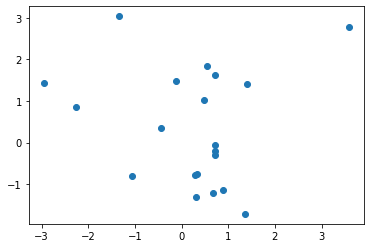

In [9]:
plt.plot(X.T[0],X.T[1], 'o')

In [10]:
z = np.array([complex(c[0], c[1]) for c in X])
m, n = np.meshgrid(z, z)
# get the distance via the norm
D = abs(m-n)
D

array([[0.        , 2.960526  , 3.14919052, 1.77966356, 3.18139832,
        2.2372648 , 1.90620727, 2.04652621, 0.74596207, 0.96587462,
        3.04431499, 0.27151269, 0.8006789 , 2.14568535, 2.63248116,
        3.00151694, 3.09328959, 3.50434143, 2.5975182 , 3.64186029],
       [2.960526  , 0.        , 3.36932984, 1.89775821, 6.14093397,
        2.3552179 , 3.12438822, 3.15927564, 2.22502619, 3.70963607,
        3.58753529, 3.07359792, 2.75315122, 3.20519143, 3.03925589,
        3.73392481, 2.05195789, 0.8954545 , 3.048322  , 4.44910949],
       [3.14919052, 3.36932984, 0.        , 1.81371819, 5.21997603,
        4.65216907, 1.30937681, 1.1716632 , 2.83223177, 2.93490407,
        0.36668802, 2.96482311, 2.34855145, 1.08400859, 0.52100055,
        0.59184203, 1.47435603, 4.26478418, 0.55279732, 1.12640998],
       [1.77966356, 1.89775821, 1.81371819, 0.        , 4.6888671 ,
        2.84395328, 1.22794464, 1.27221401, 1.18808024, 2.13306557,
        1.90369834, 1.72694901, 1.15322977, 1

In [103]:
D = sp.distance_matrix(X, X)

In [104]:
D

array([[0.        , 2.960526  , 3.14919052, 1.77966356, 3.18139832,
        2.2372648 , 1.90620727, 2.04652621, 0.74596207, 0.96587462,
        3.04431499, 0.27151269, 0.8006789 , 2.14568535, 2.63248116,
        3.00151694, 3.09328959, 3.50434143, 2.5975182 , 3.64186029],
       [2.960526  , 0.        , 3.36932984, 1.89775821, 6.14093397,
        2.3552179 , 3.12438822, 3.15927564, 2.22502619, 3.70963607,
        3.58753529, 3.07359792, 2.75315122, 3.20519143, 3.03925589,
        3.73392481, 2.05195789, 0.8954545 , 3.048322  , 4.44910949],
       [3.14919052, 3.36932984, 0.        , 1.81371819, 5.21997603,
        4.65216907, 1.30937681, 1.1716632 , 2.83223177, 2.93490407,
        0.36668802, 2.96482311, 2.34855145, 1.08400859, 0.52100055,
        0.59184203, 1.47435603, 4.26478418, 0.55279732, 1.12640998],
       [1.77966356, 1.89775821, 1.81371819, 0.        , 4.6888671 ,
        2.84395328, 1.22794464, 1.27221401, 1.18808024, 2.13306557,
        1.90369834, 1.72694901, 1.15322977, 1

In [53]:
D[:,Y[:,1:k+1]].shape

(20, 20, 3)

In [109]:
D = sp.distance_matrix(X, X)
    #pairs = [list(zip(np.linspace(0,len(X)-1,len(X)), D[i])) for i in range(len(X))]
    # Sort distance matrix
kn = np.argsort(D,kind='mergesort')

In [110]:
kn = kn[:,1:k+1]
kn

array([[11,  8, 12],
       [17,  3, 16],
       [10, 14, 18],
       [12,  8,  6],
       [ 9, 11,  0],
       [ 8,  0, 17],
       [ 7, 13, 18],
       [13,  6, 18],
       [ 0, 12, 11],
       [11,  0, 12],
       [15,  2, 14],
       [ 0, 12,  9],
       [11,  8,  0],
       [ 7,  6, 18],
       [18,  2, 10],
       [10,  2, 18],
       [ 3, 14, 18],
       [ 1,  5,  3],
       [14,  2, 10],
       [15, 10,  2]])

In [111]:
np.sum(np.take_along_axis(D, kn, axis = 1),axis = 1)/k

array([0.60605122, 1.61505687, 0.48016196, 1.18975155, 2.9391052 ,
       2.15531725, 0.39399627, 0.30516081, 0.78748142, 0.89540255,
       0.38559917, 0.5443959 , 0.73397995, 0.31464285, 0.37699473,
       0.50109139, 1.35790455, 1.96372676, 0.38922825, 0.9100659 ])

In [115]:
def gammaidx(X, k):
    """
    Gamma identification for outlier detection by ranking
    """
    y = []
    # Calculate distance matrix
    D = sp.distance_matrix(X, X)
    # Sort distance matrix
    kn = np.argsort(D,kind='mergesort')
    # identify k-nearest neighbours
    kn = kn[:,1:k+1]
    # sum over k-neaest neighbours and divide bei k
    y = np.sum(np.take_along_axis(D, kn, axis = 1),axis = 1)/k
    
    return y

In [116]:
y = gammaidx(X, k)

In [117]:
y

array([0.60605122, 1.61505687, 0.48016196, 1.18975155, 2.9391052 ,
       2.15531725, 0.39399627, 0.30516081, 0.78748142, 0.89540255,
       0.38559917, 0.5443959 , 0.73397995, 0.31464285, 0.37699473,
       0.50109139, 1.35790455, 1.96372676, 0.38922825, 0.9100659 ])

In [25]:
correct_gamma = np.array([ 0.606051220224367, 1.61505686776722, 0.480161964450438, 1.18975154873627,
                                    2.93910520141032, 2.15531724762712, 0.393996268071324, 0.30516080506303,
                                    0.787481421847747, 0.895402545799062, 0.385599174039363, 0.544395897115756,
                                    0.73397995201338, 0.314642851266896, 0.376994725474732, 0.501091387197748,
                                    1.3579045507961, 1.96372676400505, 0.389228251829715, 0.910065898315003])

In [13]:
pos_label = 1
y_true = test1_y_true
y_pred = test1_y_pred

In [7]:
def auc(y_true,y_pred,plot=False):
    #1. FIND ROC CURVE POINTS & FPR/TPR
    pos_label=1
    y_true=(y_true==pos_label) #boolean vec of true labels

    #arrange predictions in descending order (indexes)
    descending_scores=np.argsort(y_pred,kind='mergesort')[::-1]
    #ascending_scores=np.argsort(y_pred,kind='mergesort')[::1]
    y_pred=y_pred[descending_scores]
    y_true=y_true[descending_scores]

    #determine distinct values to create an index of decreasing values
    #'predicted value in y_pred where lower values tend to correspond to label -1 and higher values to label +1'
    distinct_values_idx=np.where(np.diff(y_pred))[0]#length n-1 as calculating differences
    distinct_descending_scores_idx=np.r_[distinct_values_idx,y_true.size-1]# add last entry

    tps=np.cumsum(y_true)[distinct_descending_scores_idx]#cumulative sum of true positives using idx
    fps=1-tps+distinct_descending_scores_idx #same as cum sum of false positives

    #add 0,0 position for ROC curve
    tps=np.r_[0,tps]
    fps=np.r_[0,fps]

    #false/true positive rate
    fpr=fps/fps[-1] #rate=sum/max
    tpr=tps/tps[-1]
    
    #2.PLOT ROC CURVE POINTS
    if plot==True:
        plt.plot(fpr,tpr,label='Algorithm')
        plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),label='Random guesses')
        plt.ylabel('True Positive Rate (TPR)')
        plt.xlabel('False Positive Rate (FPR)')
        plt.title('ROC Curve')
        plt.legend()

    #3. CALCULATE AUC
    #reshape needed
    fpr=fpr.reshape(1,fpr.shape[0])
    tpr=tpr.reshape(1,tpr.shape[0])
    
    #assume positive area
    end=1
    #check if negative area (good discrimination, just switch labels)
    diff_fpr=np.diff(fpr)
    if np.all(diff_fpr<=0):
        end=-1
    #calculate area using trapezoidal approach
    area=end*np.trapz(tpr,fpr)

    return area

In [6]:
test1_y_true=np.array([-1, -1, -1, +1, +1])
test1_y_pred=np.array([0.3, 0.4, 0.5, 0.6, 0.7])#ans=1.0
test2_y_true=np.array([-1, -1, -1, +1, +1, +1])
test2_y_pred=np.array([0.3, 0.4, 0.6, 0.5, 0.7, 0.8])#ans=0.89
test3_y_true=np.array([+1, -1, -1, +1, +1, -1])
test3_y_pred=np.array([0.3, 0.4, 0.6, 0.5, 0.7, 0.8])#ans=1/3

array([1.])

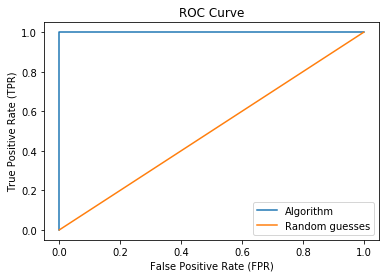

In [30]:
auc(test1_y_true,test1_y_pred,plot=True)

array([0.88888889])

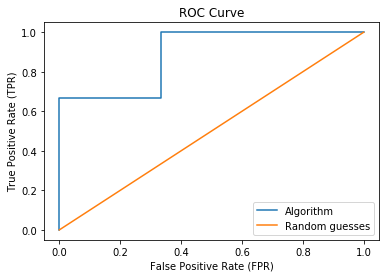

In [31]:
auc(test2_y_true,test2_y_pred,plot=True)

In [32]:
auc(test3_y_true,test3_y_pred,plot=False)

array([0.33333333])

In [375]:
def lle(X, m, tol, n_rule, k=None, epsilon=None):
    # compute neighborhoord by kNN or eps-bole rule
    
    # 1. calculate euclidean distance of data
    D = sp.distance_matrix(X, X)
    
    # 2. check for applied rule
    if n_rule == 'knn':
        # check if k is provided
        assert (k != None), """The parameter 'k' is required for the 'knn' rule"""
        # 3a. calculate k nearest neighbors
        # Sort distance matrix
        kn = np.argsort(D,kind='mergesort')
        # identify k-nearest neighbors
        kn = kn[:,1:k+1]
        
    elif n_rule == 'eps-ball':
        # check if epsilon is provided
        assert (epsilon != None), """The parameter 'epsilon' is required for the 'eps-ball' rule"""
        # 3b. compare distance by epsilon
        # tupel (1. element, 2. element)
        idx = np.argwhere(D<epsilon)
        # row wise all points in the neighborhood
        kn = [idx[:,1][idx[:,0]==i] for i in np.unique(idx[:,0])]
    else:
        print("""The following rule {} is not known. Please use either 'knn' or 'eps-ball'.""".format(n_rule))
    
    # 4. calculate reconstruction weights 
    # intialize weight matrix
    W = np.zeros((len(X),len(X)))
    # calculate weights for every point
    for i in range(len(X)):
        # calculate covariance matrix
        C = np.cov(X[kn[i]])
        # solve for weights 
        I = np.eye(len(X[kn[i]]))
        weights = np.linalg.solve(C - tol*I, np.ones(len(X[kn[i]]))).reshape(len(X[kn[i]]),1)
        # normalize weights
        # weights = weights.T*np.ones(len(X[kn[i]]))*weights
        W[i,kn[i]] = weights
    Y = weights

    return Y

In [418]:
C = lle(X,2,3,'eps-ball',epsilon = 5)

In [347]:
W = np.zeros((len(X),len(X)))

In [419]:
C = C.reshape(181,1)

In [420]:
C.T.shape

(1, 181)

In [433]:
W = (1/(C.T*np.ones(181)))

In [437]:
print(W.shape)
print(C.shape)

(1, 181)
(181, 1)


In [343]:
C.T * np.ones(len(X[kn[499]])) *C

array([3.96663297e-03, 2.86229678e-02, 1.39915364e-02, 1.78135661e-02,
       4.37250203e-03, 4.49587842e-02, 1.04492274e-02, 4.00201504e-02,
       4.30566350e-02, 7.03578546e-03, 6.09488002e-05, 1.99059806e-02,
       2.57227622e-03, 8.24751657e-03, 1.34159039e-02, 9.01721790e-02,
       1.38017457e-03, 8.42849876e-04, 3.68288783e-02, 6.39222972e-03,
       4.43210838e-03, 1.33344852e-03, 1.22288647e-02, 3.89911847e-03,
       3.23833794e-02, 2.28598202e-02, 2.63928904e-04, 2.82016420e-02,
       1.11820760e-03, 3.30304595e-02, 2.33595451e-03, 6.91438312e-05,
       1.01481034e-02, 1.68090261e-03, 5.54222483e-03, 2.16828799e-04,
       1.42976928e-02, 4.18043407e-02, 6.39884285e-04, 1.73058006e-02,
       7.11379389e-05, 9.27891072e-03, 5.35506416e-03, 7.54612664e-03,
       5.11567866e-02, 2.81261021e-02, 1.29148762e-02, 3.59726841e-02,
       3.34557525e-02, 3.14532182e-02, 3.05548126e-03, 2.83832049e-02,
       8.30541762e-05, 4.88117759e-03, 3.92526467e-03, 1.44258094e-03,
      

In [314]:
np.ones(137)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [32]:
# Test set for lle
def randrot(d):
    '''generate random orthogonal matrix'''
    M = 100. * (np.random.rand(d, d) - 0.5)
    M = 0.5 * (M - M.T);
    R = expm(M);
    return R

def test_lle():
    n = 500
    Xt = 10. * np.random.rand(n, 2);
    X = np.append(Xt, 0.5 * np.random.randn(n, 8), 1);

    # Rotate data randomly.
    X = np.dot(X, randrot(10).T)
    return X

In [34]:
X = test_lle()

In [38]:
D = sp.distance_matrix(X, X)

In [49]:
np.argwhere(D < 5)

array([[  0,   0],
       [  0,   3],
       [  0,  10],
       ...,
       [499, 493],
       [499, 497],
       [499, 499]])

In [25]:
kn = np.argsort(D,kind='mergesort')

In [208]:
k = 5
kn = np.argsort(D,kind='mergesort')
        # identify k-nearest neighbors
kn = kn[:,1:k+1]
kn

array([[464, 401,  98, 179, 436],
       [  7, 485, 382, 197,  92],
       [419, 237, 352, 317, 399],
       ...,
       [265, 204, 212, 472, 269],
       [448, 270, 427, 194, 271],
       [294,  12,   6, 330,  46]])

In [210]:
kn = list(kn)

In [215]:
kn[0]

array([464, 401,  98, 179, 436])

In [50]:
boolArr = D < 5

In [185]:
idx = list(idx)

In [187]:
boolArr

array([[ True, False, False, ...,  True,  True, False],
       [False,  True, False, ...,  True, False,  True],
       [False, False,  True, ..., False, False, False],
       ...,
       [ True,  True, False, ...,  True, False,  True],
       [ True, False, False, ..., False,  True, False],
       [False,  True, False, ...,  True, False,  True]])

In [196]:
idx[:,1]

TypeError: list indices must be integers or slices, not tuple

In [98]:
np.where(D < 5)[1][np.where(D<5)[0]==np.unique(np.where(D<5)[0])]

/Users/leo/anaconda3/envs/Python37/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


array([], shape=(0, 105442), dtype=int64)

In [271]:
idx = np.argwhere(D<5)
kn = [idx[:,1][idx[:,0]==i] for i in np.unique(idx[:,0])]

In [272]:
idx

array([[  0,   0],
       [  0,   3],
       [  0,  10],
       ...,
       [499, 493],
       [499, 497],
       [499, 499]])

In [243]:
idx = list(idx)

In [267]:
kn = [idx[:,1][idx[:,0]==i] for i in np.unique(idx[:,0])]

In [270]:
kn

[array([  0,   3,  10,  11,  13,  17,  19,  20,  21,  22,  23,  25,  29,
         31,  34,  35,  37,  39,  45,  48,  50,  51,  53,  58,  62,  64,
         65,  69,  70,  71,  72,  73,  75,  76,  77,  78,  79,  80,  83,
         84,  90,  94,  97,  98,  99, 100, 101, 102, 105, 107, 108, 111,
        112, 115, 116, 122, 125, 127, 128, 129, 130, 131, 137, 139, 140,
        141, 144, 145, 147, 149, 151, 153, 154, 156, 160, 161, 162, 164,
        167, 168, 169, 170, 178, 179, 180, 182, 183, 184, 185, 191, 194,
        195, 196, 200, 204, 205, 209, 210, 212, 213, 215, 217, 218, 220,
        223, 224, 230, 232, 234, 236, 239, 240, 241, 243, 245, 246, 250,
        253, 254, 255, 256, 257, 258, 260, 261, 262, 264, 265, 267, 269,
        270, 271, 273, 274, 275, 276, 279, 281, 282, 283, 284, 286, 287,
        290, 291, 292, 293, 295, 297, 298, 299, 300, 304, 308, 311, 313,
        315, 316, 319, 321, 322, 324, 325, 329, 331, 332, 334, 343, 346,
        347, 348, 354, 355, 356, 360, 361, 362, 363

In [280]:
#idx =range(500)
idx = np.tile(X,(500,1))

In [281]:
idx

array([[-2.58747204, -5.18021932,  4.79356633, ..., -3.82292945,
         0.33844073,  2.63289831],
       [-1.65851436, -0.07136169,  1.03358652, ..., -1.318716  ,
         0.62081895,  0.83609778],
       [-1.55855515, -2.96885391,  5.67701533, ..., -1.79556645,
         1.63963193,  0.22842368],
       ...,
       [-1.45434291, -2.81478501,  2.55746659, ..., -2.12080619,
         0.16828948,  0.74785296],
       [-2.8309121 , -5.76016852,  6.29219251, ..., -5.12434564,
        -0.42415124,  1.55829313],
       [-0.87532613, -0.72407473,  2.62661966, ..., -1.18277377,
        -1.05198015,  0.35256857]])

In [206]:
idx[1][boolArr[1]]

array([  1,   4,   5,   6,   7,  10,  12,  14,  15,  17,  22,  27,  28,
        29,  30,  31,  32,  38,  42,  44,  46,  51,  54,  56,  66,  68,
        69,  72,  86,  88,  89,  91,  92,  97, 110, 113, 114, 117, 120,
       121, 124, 126, 133, 139, 141, 148, 159, 173, 175, 180, 182, 186,
       189, 190, 191, 192, 197, 201, 202, 203, 204, 206, 207, 208, 210,
       212, 216, 221, 222, 223, 227, 234, 246, 249, 252, 259, 263, 265,
       266, 269, 273, 274, 278, 280, 281, 282, 284, 288, 289, 294, 298,
       301, 302, 310, 314, 315, 316, 321, 323, 330, 333, 343, 346, 359,
       364, 367, 369, 371, 373, 380, 381, 382, 393, 394, 395, 403, 405,
       414, 423, 425, 441, 443, 449, 458, 459, 463, 467, 468, 470, 472,
       476, 480, 484, 485, 489, 497, 499])

In [154]:
boolarg= D < 5

In [174]:
np.extract(boolarg,idx)

TypeError: _extract_dispatcher() got an unexpected keyword argument 'axis'

In [173]:
idx[boolarg == True]

SyntaxError: invalid syntax (<ipython-input-173-9099a81db049>, line 1)

In [139]:
np.take_along_axis(idx, boolarg, axis = 1)

IndexError: `indices` must be an integer array

In [101]:
np.unique(np.where(D<5)[0])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [97]:
np.unique(np.where(D<5)[0])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [94]:
np.argwhere(D<5)

array([[  0,   0],
       [  0,   3],
       [  0,  10],
       ...,
       [499, 493],
       [499, 497],
       [499, 499]])

In [63]:
D.index(D<5)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [65]:
D[D < 5]

array([0.        , 3.04191656, 4.226363  , ..., 3.49186392, 3.45717094,
       0.        ])

In [87]:
index = np.nonzero(D < 5)

In [88]:
index

(array([  0,   0,   0, ..., 499, 499, 499]),
 array([  0,   3,  10, ..., 493, 497, 499]))